In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Batch for training, then gradients and improvement of model, doing till all batches are exhausted (aka one epoch done)

In [ ]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train","test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True,
)
#info
dataset_train_original = datasets[0]
dataset_validate_original = datasets[1]
dataset_test_original = datasets[2]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWWDHGG/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWWDHGG/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWWDHGG/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for x, y in dataset_train_original.take(6):
  print(x)
  print(y)
  print("")

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on 

In [ ]:
for x, y in dataset_train_original.take(6):
  print(x.numpy().decode("utf-8"))
  print(y.numpy())
  print("")

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was c

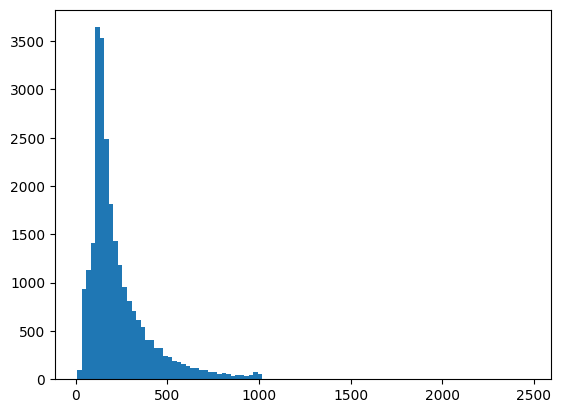

In [ ]:
lengths = []
for x, _ in dataset_train_original:
  lengths.append(len(x.numpy().split()))

plt.hist(lengths, bins=100)
plt.show()

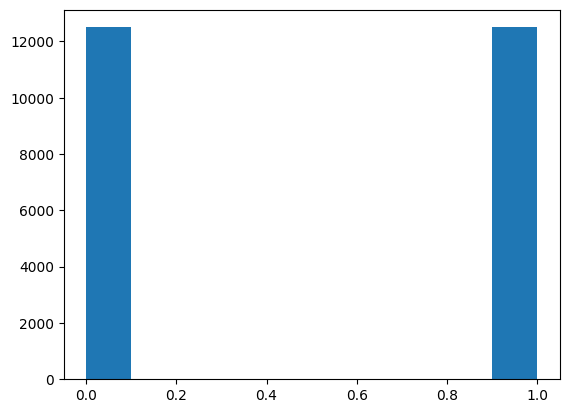

In [ ]:
# Is the target balanced?
labels = []
for _,y in dataset_train_original:
  labels.append(y.numpy())

plt.hist(labels)
plt.show()

In [ ]:
#np

#Bag of words encoding

In [ ]:
for sample in dataset_train_original.map(lambda text, label: text).batch(4).take(1):
  print(sample)

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

In [ ]:
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot"
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(2048))

In [ ]:
# sorted by frequency
print(encoder.get_vocabulary())

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any', 'too', 'after', 'characters', 'think', 'watch', 'two', 'many', 'being', 'seen', 'character', 'never', 'little', 'acting', 'where', 'plot', 'best', 'love', 'did', 'know', 'life', 'show', 'does', 'ever', 'your', 'still', 'better', 'over', 'off', 'these', 'end', '

In [ ]:
text = "Hallo Welt"
encoder(text)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [ ]:
# Not everything in encoder-vocabulary
#assert "Welt" in encoder.get_vocabulary()

In [ ]:
# Store training in cache for higher speed
dataset_train = dataset_train_original.cache()
dataset_train = dataset_train.shuffle(25_000)
# Parallelize for speed and smooth gradients
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

In [ ]:
dataset_test = dataset_test_original.cache()
dataset_test = dataset_test.batch(128)

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))
# Dropout Layer added for lower overfitting
model.add(layers.Dropout(0.1))
# Binary categorization
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10000)             0         
 ctorization)                                                    
                                                                 
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640129 (2.44 MB)
Trainable params: 640129 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.predict(["Lord of the rings is a triology about people hiking and I love that."])

1/1 [==============================] - 3s 3s/step


array([[0.5090092]], dtype=float32)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), # alt simply only "adam", but then setting of learning rate not right here
    # loss function for binary classification
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
loss, accuracy = model.evaluate(dataset_test)
print(f"Loss: {loss} Accuracy: {accuracy}")

98/98 [==============================] - 4s 39ms/step - loss: 0.6924 - accuracy: 0.5132
Loss: 0.6923984885215759 Accuracy: 0.5131999850273132


In [ ]:
history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)
# 196 = batches
# accuracy going up, loss (cross entropy) going down.
# However, same on validation going the other way
# --> Overfitting!

Epoch 1/10
196/196 [==============================] - 7s 25ms/step - loss: 0.3418 - accuracy: 0.8600 - val_loss: 0.2851 - val_accuracy: 0.8822
Epoch 2/10
196/196 [==============================] - 3s 16ms/step - loss: 0.1918 - accuracy: 0.9272 - val_loss: 0.3050 - val_accuracy: 0.8766
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 0.1389 - accuracy: 0.9498 - val_loss: 0.3337 - val_accuracy: 0.8736
Epoch 4/10
196/196 [==============================] - 4s 19ms/step - loss: 0.1012 - accuracy: 0.9642 - val_loss: 0.3672 - val_accuracy: 0.8685
Epoch 5/10
196/196 [==============================] - 3s 15ms/step - loss: 0.0706 - accuracy: 0.9775 - val_loss: 0.4188 - val_accuracy: 0.8635
Epoch 6/10
196/196 [==============================] - 4s 18ms/step - loss: 0.0489 - accuracy: 0.9864 - val_loss: 0.4838 - val_accuracy: 0.8630
Epoch 7/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0305 - accuracy: 0.9937 - val_loss: 0.5236 - val_accuracy: 0.8635

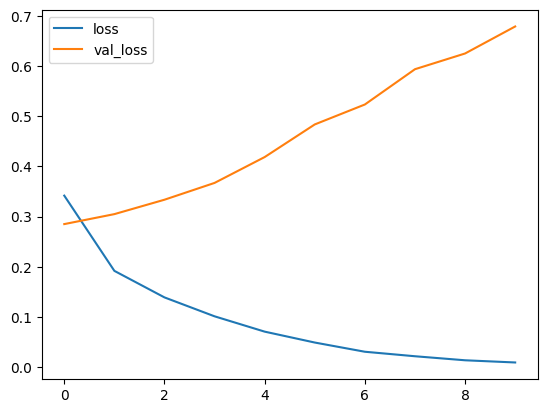

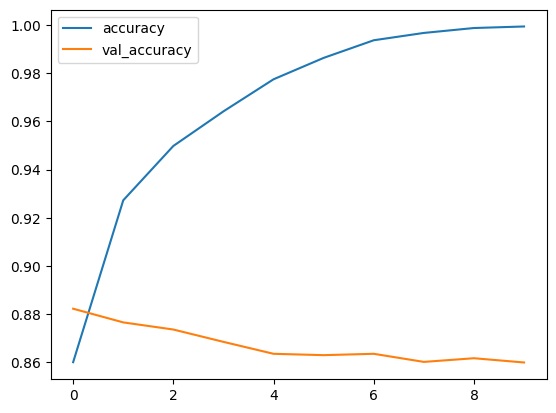

In [ ]:
def render_history(history):
  #print(history.history
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.legend()
  plt.show()

  plt.plot(history.history["accuracy"], label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.legend()
  plt.show()


render_history(history)

In [ ]:
model.predict(["Lord of the rings is a triology about people hiking and I love that."])

1/1 [==============================] - 0s 297ms/step


array([[0.7297786]], dtype=float32)

#Word embeddings

In [ ]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_train_original.map(lambda text, _: text).batch(2048))

In [ ]:
print(encoder.get_vocabulary())
# [UNK] = unknown. All the words that are cut off (because of vocabulary size do not fit in it), are summed up into the token "unknown"

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any', 'too', 'after', 'characters', 'think', 'watch', 'two', 'many', 'being', 'seen', 'character', 'never', 'little', 'acting', 'where', 'plot', 'best', 'love', 'did', 'know', 'life', 'show', 'does', 'ever', 'your', 'still', 'better', 'over', 'off', 'these', 'end

In [ ]:
encoder.get_vocabulary()[0] # Padding token
# Reviews that are shorter than sequence_length will get filled up with the padding token

''

In [ ]:
encoder("Hi kids! This is a text we will now put into the encoder to see what will happen.")
# e.g. "a" got encoded to 4, just as we've seen before when we put out the vocabulary (4 in list above!)

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([9997,  327,   11,    7,    4, 3074,   72,   77,  150,  266,   78,
          2,    1,    6,   68,   49,   77,  596,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])>

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.summary()

prediction= model.predict(["Last night a little dancer came dancing to my door. Last night a little angel came pumping on my floor."])
# In Output shpe of model summary, "none" is placeholder for batch size. In example above, batchsize = 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 128)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
Total params: 320000 (1.22 MB)
Trainable params: 320000 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 156ms/step


(1, 128, 32) float32


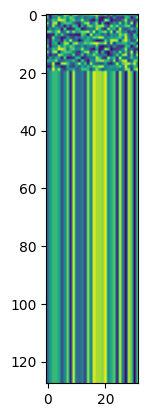

In [ ]:
# Before adding layers, network only does the encoding
print(prediction.shape, prediction.dtype)
plt.imshow(prediction[0])
# Image represents vectors of the embedding and padding to fill up item to end of max size

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.Flatten()) # Flatten to reduce to one dimension
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid")) # For classification, only sigmoid and softmax are valid activation functions. Relu would be for hidden layers
model.summary()

prediction= model.predict(["Last night a little dancer came dancing to my door. Last night a little angel came pumping on my floor."])
# In Output shpe of model summary, "none" is placeholder for batch size. In example above, batchsize = 1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 128)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 128, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2097664   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2418177 (9.22 MB)
Trainable params: 2418177 (9.22 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Epoch 1/10
196/196 [==============================] - 6s 30ms/step - loss: 3.3587e-04 - accuracy: 1.0000 - val_loss: 0.8684 - val_accuracy: 0.8106
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 2.2494e-04 - accuracy: 1.0000 - val_loss: 0.8937 - val_accuracy: 0.8102
Epoch 3/10
196/196 [==============================] - 5s 23ms/step - loss: 1.6216e-04 - accuracy: 1.0000 - val_loss: 0.9165 - val_accuracy: 0.8106
Epoch 4/10
196/196 [==============================] - 4s 20ms/step - loss: 1.2290e-04 - accuracy: 1.0000 - val_loss: 0.9379 - val_accuracy: 0.8112
Epoch 5/10
196/196 [==============================] - 5s 24ms/step - loss: 9.5298e-05 - accuracy: 1.0000 - val_loss: 0.9558 - val_accuracy: 0.8112
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 7.6103e-05 - accuracy: 1.0000 - val_loss: 0.9720 - val_accuracy: 0.8114
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 6.1838e-05 - accuracy: 1.0000 - val_loss: 0

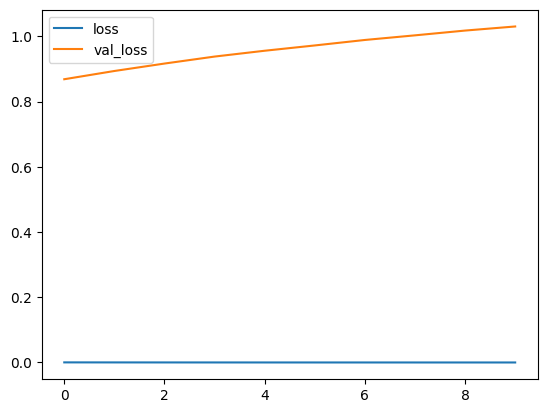

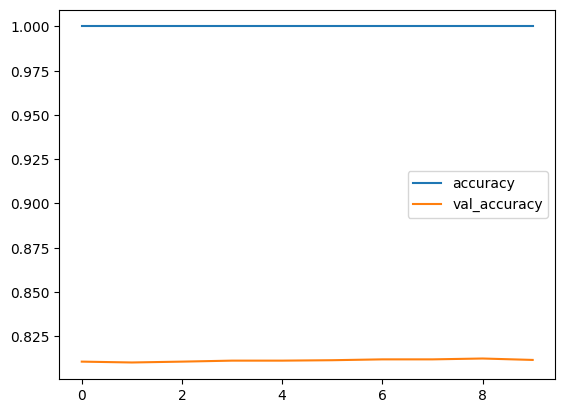

In [ ]:
history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=10
)

render_history(history)

In [ ]:
# Embedding

# "" 0 [....vector....]
# [UNK] 1 [....vector....]
# the 2 [....vector....]
# and 3 [....vector....]
# ...
# hero 666 [....vector....]
# ...
# pure 1024 [....vector....]

# Every word gets index in dictionary list and a vector with initially randomly generated figures

#LSTM


In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 128)               0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 128, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344897 (1.32 MB)
Trainable params: 344897 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Epoch 1/10
196/196 [==============================] - 25s 109ms/step - loss: 0.5176 - accuracy: 0.7216 - val_loss: 0.4326 - val_accuracy: 0.8234
Epoch 2/10
196/196 [==============================] - 14s 72ms/step - loss: 0.3042 - accuracy: 0.8778 - val_loss: 0.3983 - val_accuracy: 0.8206
Epoch 3/10
196/196 [==============================] - 10s 50ms/step - loss: 0.2410 - accuracy: 0.9067 - val_loss: 0.4304 - val_accuracy: 0.8280
Epoch 4/10
196/196 [==============================] - 8s 39ms/step - loss: 0.2003 - accuracy: 0.9279 - val_loss: 0.5466 - val_accuracy: 0.8122
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1637 - accuracy: 0.9421 - val_loss: 0.5171 - val_accuracy: 0.8164
Epoch 6/10
196/196 [==============================] - 7s 34ms/step - loss: 0.1373 - accuracy: 0.9530 - val_loss: 0.5920 - val_accuracy: 0.8169
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 0.1228 - accuracy: 0.9584 - val_loss: 0.5637 - val_accuracy: 0.

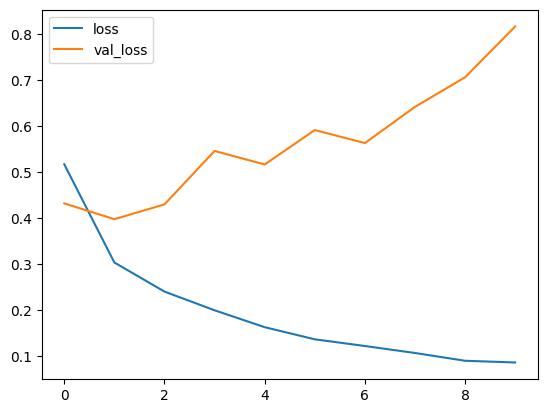

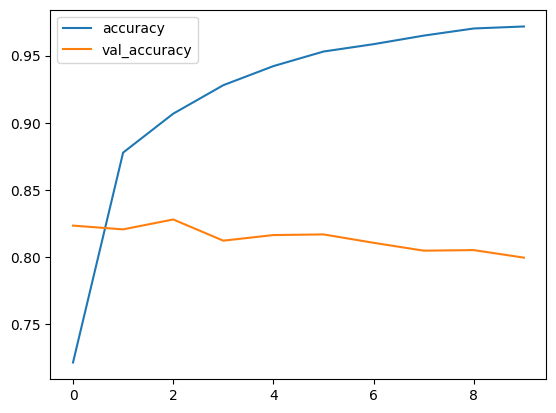

In [ ]:
history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=10
)

render_history(history)

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.LSTM(64, return_sequences=True)) # with return_sequences you can stack LSTM on top of each other (because they return matrices)
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(256, return_sequences=False)) # Not so with return_sequence = False. Here a vector is returned (See above in output shape)
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 128)               0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 128, 32)           320000    
                                                                 
 lstm_3 (LSTM)               (None, 128, 64)           24832     
                                                                 
 lstm_4 (LSTM)               (None, 128, 128)          98816     
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                      